In [1]:
from autoencoders import CNNAutoencoder, limit_memory

In [2]:
limit_memory(gb=4)

In [3]:
import numpy as np
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(60_000, 28, 28, 1) / 255
x_test = x_test.reshape(10_000, 28, 28, 1) / 255

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
cnn_aut_config = {
    'x_train': x_train,
    'x_test': x_test,
    'input_shape': (28, 28, 1),
    'layers_config': {'encoder_layers': [16, 8, 8],
                      'decoder_layers': [8, 8, 16]},
    'loss': 'binary_crossentropy',
}

In [5]:
cnn_aut = CNNAutoencoder(**cnn_aut_config).init_model()
cnn_aut.compile()

In [6]:
cnn_aut.autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [7]:
cnn_aut.fit(10, 128)

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.2217 - val_loss: 0.1556
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1411 - val_loss: 0.1288
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1248 - val_loss: 0.1209
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1186 - val_loss: 0.1154
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1147 - val_loss: 0.1118
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1117 - val_loss: 0.1092
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1094 - val_loss: 0.1073
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1075 - val_loss: 0.1061
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1058 - val_loss: 0.1038
Epoch 10/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1045 - val_loss: 0.1032

313/313 [==============================] - 1s 2ms/step


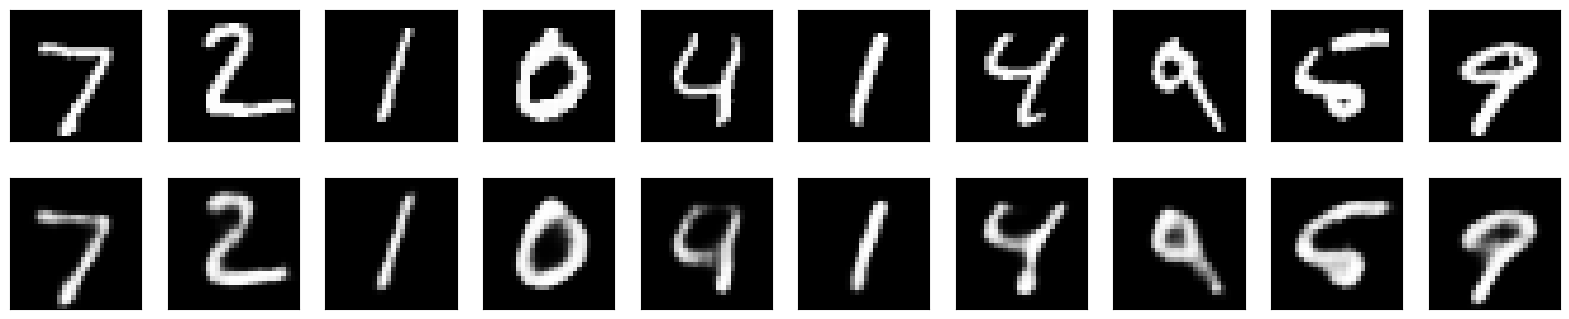

In [8]:
cnn_aut.show_examples()

In [9]:
encoder = cnn_aut.get_encoder()

In [10]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

In [11]:
encoded = encoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [12]:
encoded.shape

(10000, 4, 4, 8)

In [13]:
decoder = cnn_aut.get_decoder()

In [14]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [15]:
decoded = decoder.predict(encoded)

313/313 [==============================] - 0s 1ms/step


In [16]:
decoded.shape

(10000, 28, 28, 1)

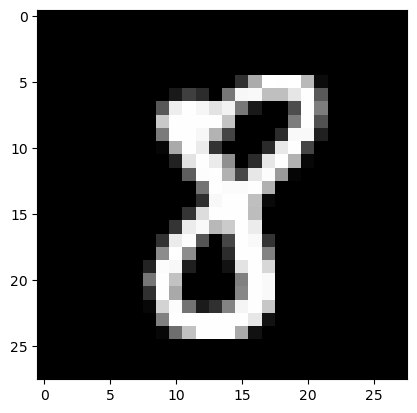

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x_test[134].reshape(28, 28))
plt.show()

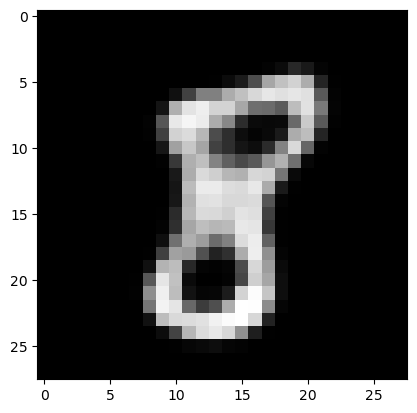

In [18]:
plt.imshow(decoded[134].reshape(28, 28))
plt.show()